# Customer Segmentation Project - Part 2 [EDA & Processing]

**A Classification & Clustering Model**

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [3]:
df_raw = pd.read_csv('dataset/output_p1.csv')
df = df_raw.copy()
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


## EDA

In [4]:
# Membedakan data categorical dan numeric
num_dtypes=['int64','float64']
cat_dtypes=['object']

num_df = df.select_dtypes(include = num_dtypes)
cat_df = df.select_dtypes(include = cat_dtypes)
numericals = num_df.columns
categoricals = cat_df.columns

print(numericals)
print(categoricals)

Index(['Age', 'Work_Experience', 'Family_Size'], dtype='object')
Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1', 'Segmentation'],
      dtype='object')


### Numerical

#### Univariate Analysis

In [5]:
df[numericals].describe()

,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,8068.000000
mean,43.466906,2.420302,2.856346
std,16.711696,3.296507,1.499577
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


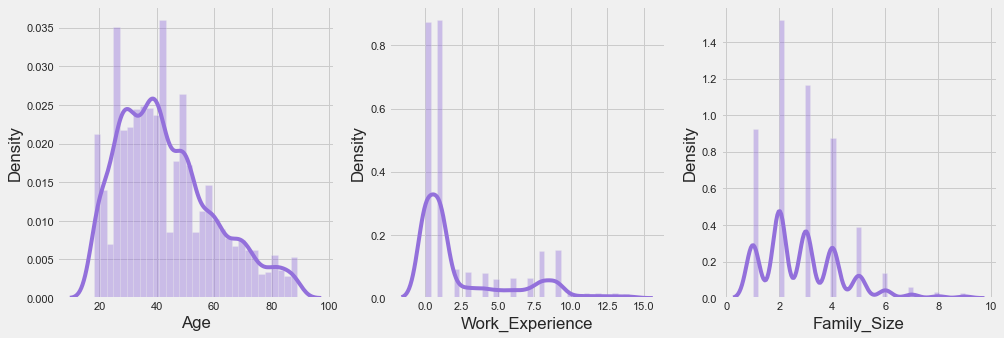

In [6]:
plt.figure(figsize=(15, 5))

for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.distplot(df[numericals[i]], color='mediumpurple')

<ipython-input-7-1f302d8fd17d>:2: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(3, len(numericals)/2, i+1)
<ipython-input-7-1f302d8fd17d>:2: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(3, len(numericals)/2, i+1)
<ipython-input-7-1f302d8fd17d>:2: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(3, len(numericals)/2, i+1)


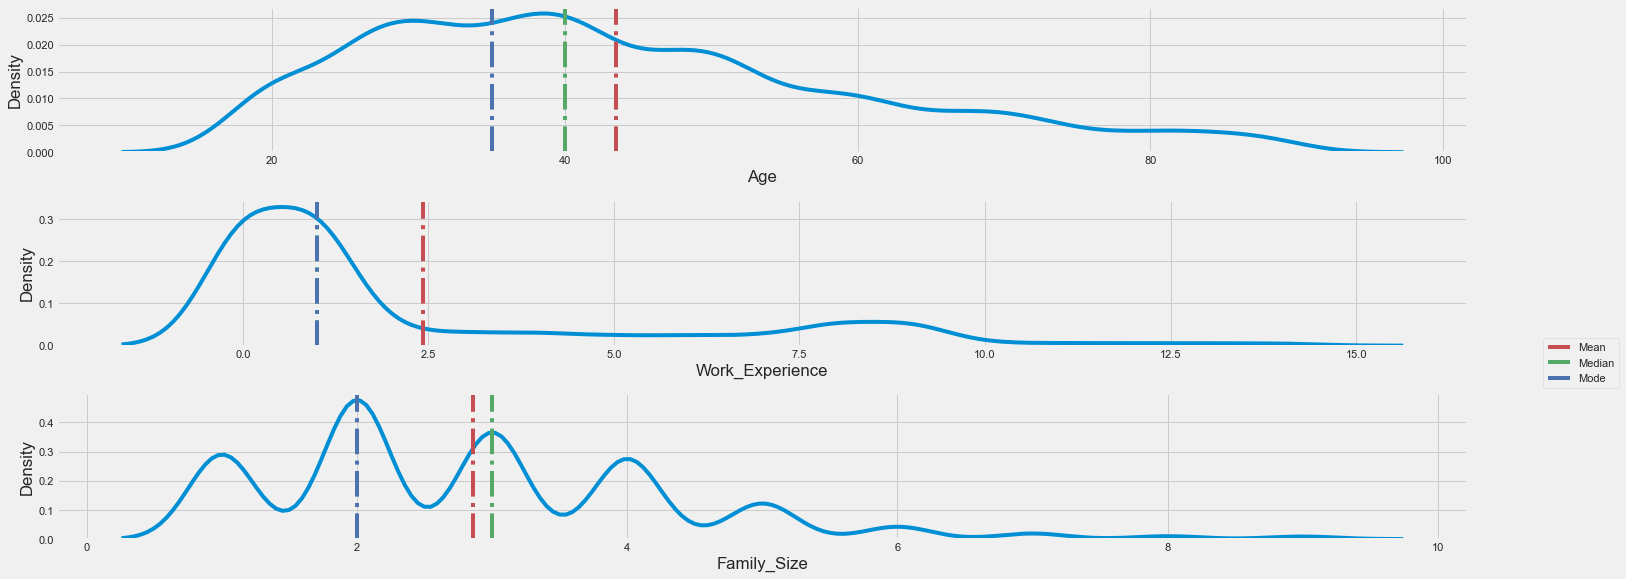

In [7]:
for i in range(0, len(numericals)):
    plt.subplot(3, len(numericals)/2, i+1)
    mean=df[numericals[i]].mean()
    median=df[numericals[i]].median()
    mode=df[numericals[i]].mode().values[0]
    sns.distplot(df[numericals[i]],hist=False)
    plt.axvline(mean, color='r', linestyle='-.', label="Mean")
    plt.axvline(median, color='g', linestyle='-.', label="Median")
    plt.axvline(mode, color='b', linestyle='-.', label="Mode")
    plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1),loc='lower left')
plt.show()

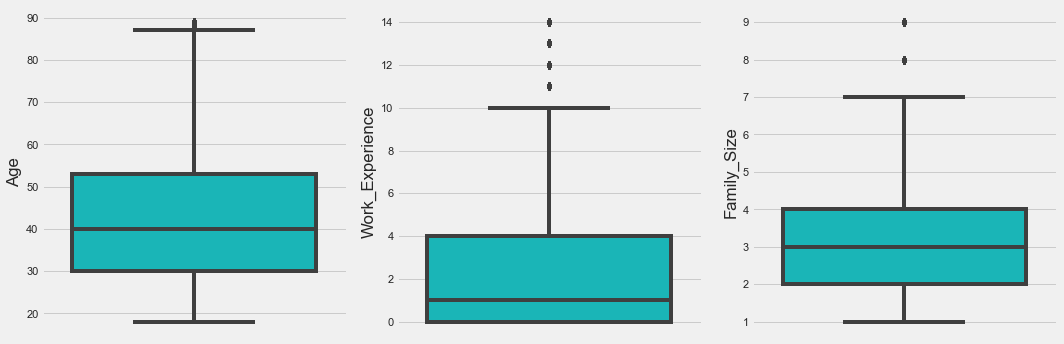

In [8]:
plt.figure(figsize=(15, 5))
for col in range(0, len(numericals)):
    plt.subplot(1, len(numericals), col+1)
    sns.boxplot(y=df[numericals[col]], color='darkturquoise', orient='v')
    plt.tight_layout()

Dari plot distribusi di atas dapat dilihat bahwa ketiga data numerical adalah positive skewed. Data `Family_Size` memiliki mean < median, sesuatu yang tidak umum terjadi pada positive skewed namun memang dapat terjadi.

In [9]:
# count outlier:
Q1 = df[numericals].quantile(0.25)
Q3 = df[numericals].quantile(0.75)
IQR = Q3 - Q1

print('Total Outliers:')
((df[numericals] < (Q1 - 1.5 * IQR)) | (df[numericals] > (Q3 + 1.5 * IQR))).sum()

Total Outliers:


Age                 71
Work_Experience    189
Family_Size         94
dtype: int64

#### Multivariate Analysis

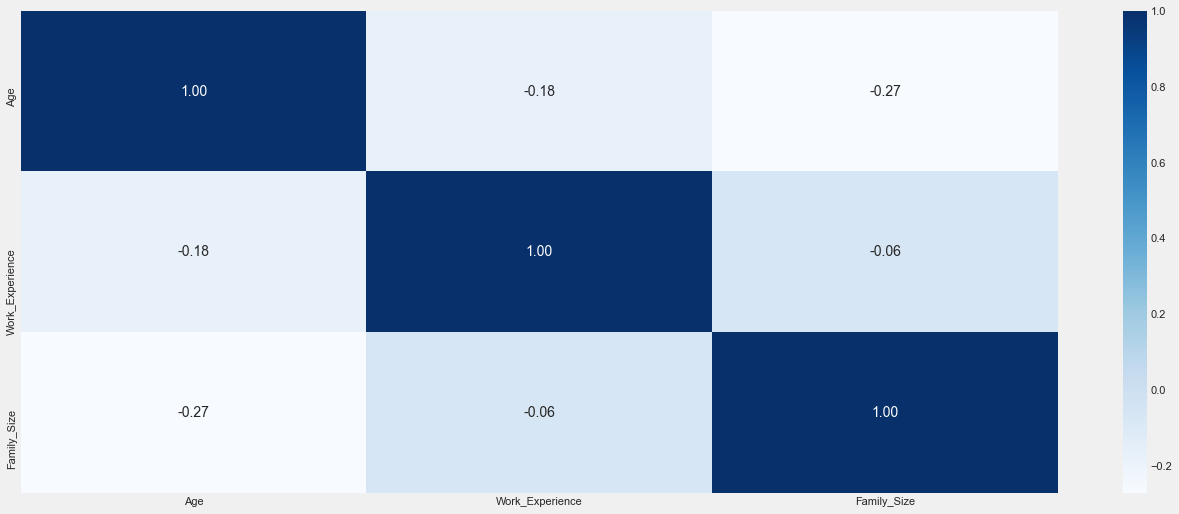

In [10]:
plt.figsize=((5,4))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
warnings.filterwarnings("ignore")

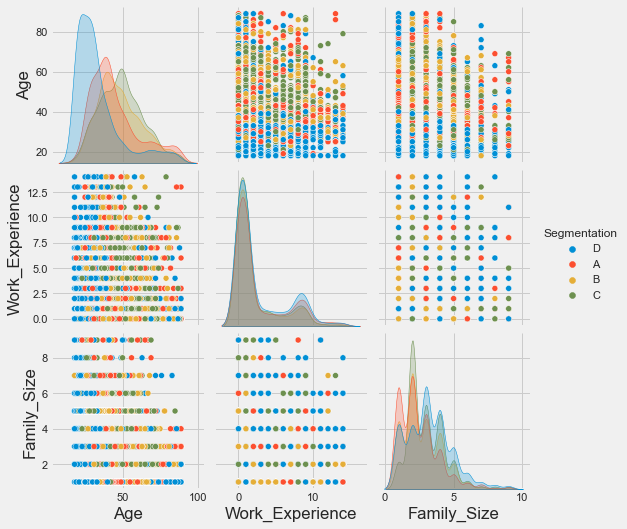

In [11]:
plt.figsize=((10,10))
sns.pairplot(df, diag_kind='kde',hue='Segmentation')
warnings.filterwarnings("ignore")

### Categorical

#### Univariate Analysis

In [12]:
df[categoricals].describe()

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,8068,8068,8068,8068,8068,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4783,5046,2640,4878,5314,2268


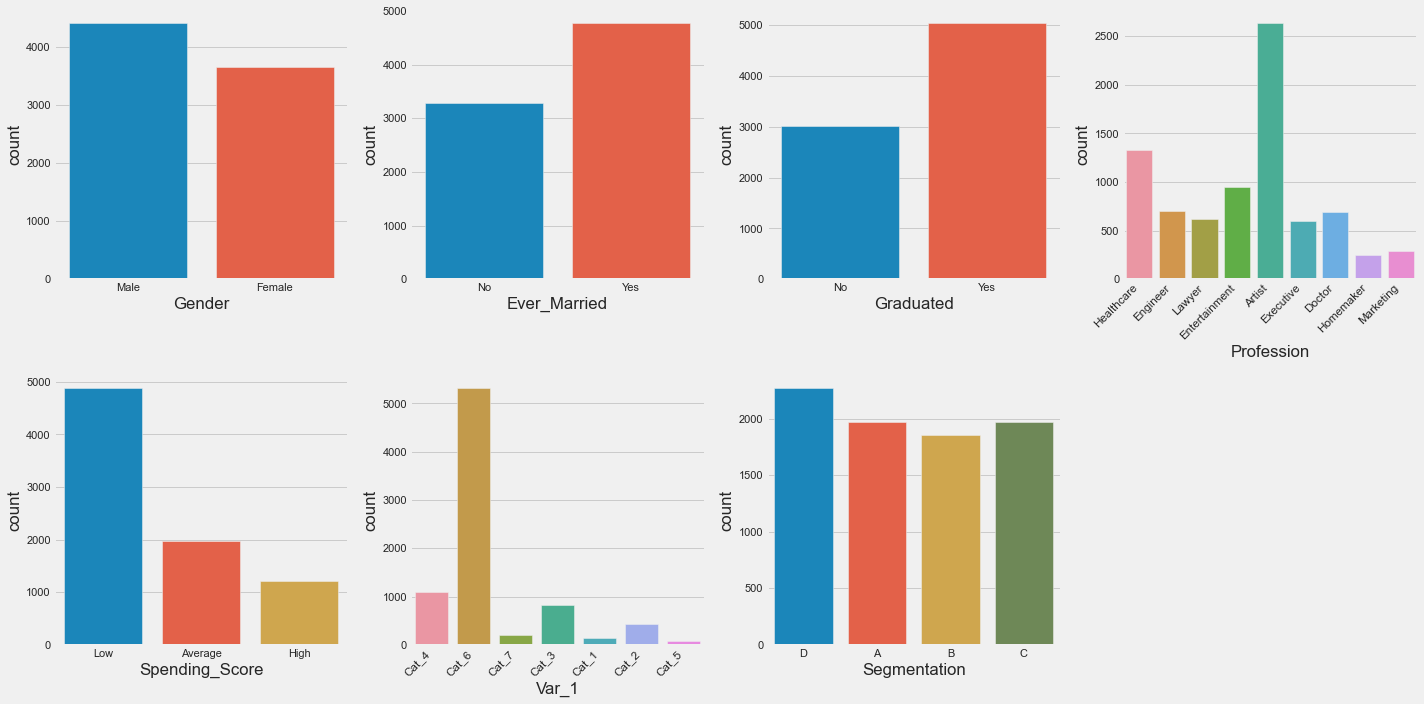

In [13]:
plt.figure(figsize=(20,10))
for i in range(0, len(categoricals)):
    plt.subplot(2, round(len(categoricals)/2,0), i+1)
    if i+1 in (4,6):
      sns.countplot(df[categoricals[i]], orient='v')
      plt.xticks(
      rotation=45, 
      horizontalalignment='right',
      fontweight='light',
      fontsize='small'  
)
    else:
       sns.countplot(df[categoricals[i]], orient='v')
    plt.tight_layout()

**With Target Data**

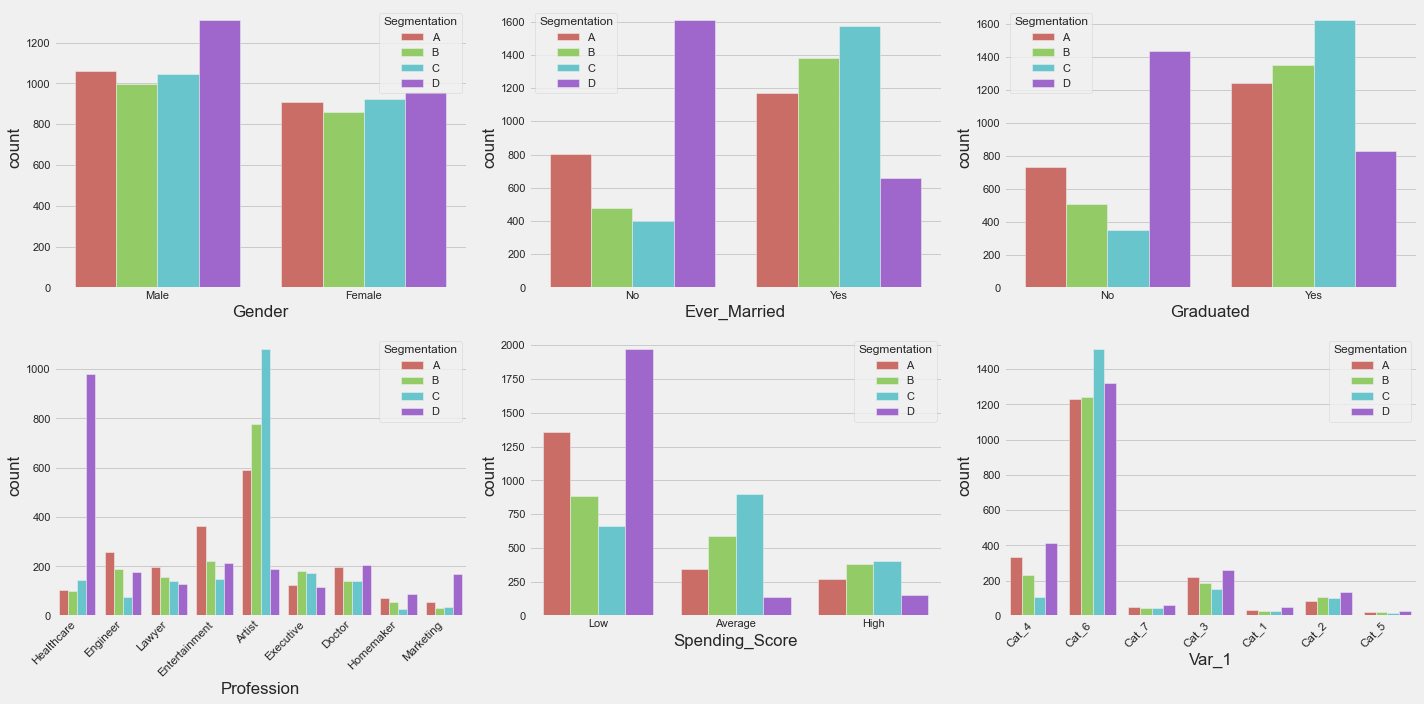

In [14]:
plt.figure(figsize=(20,10))
for i in range(0, len(categoricals)-1):
    plt.subplot(2, round((len(categoricals)-1)/2,0), i+1)
    if i+1 in (4,6):
      sns.countplot(x=categoricals[i],hue='Segmentation', hue_order=['A', 'B', 'C', 'D'], data=df[categoricals], palette='hls', orient='v')
      plt.xticks(
      rotation=45, 
      horizontalalignment='right',
      fontweight='light',
      fontsize='small'  
)
    else:
       sns.countplot(x=categoricals[i],hue='Segmentation', hue_order=['A', 'B', 'C', 'D'], data=df[categoricals], palette='hls', orient='v')
    plt.tight_layout()

**Insight:**
*   Gender Male Paling Banyak di segmen D, Female C &D
*   Customer yang sudah menikah banyak di segmen C, yang belum menikah banyak di segmen D
*   Customer yang sudah Graduate banyak di segmen C, yang belum banyak di segmen D
*   Profesi healthcare paling banyak di segmen D, artist di kelompok C
*   Spending Score customer yang low paling banyak masuk di segmen D
*   Customer dengan kategori 6 (cat6) paling banyak masuk di segmen C

## Data Processing

### Target Imbalance Checking

In [15]:
df['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

Setiap segmen terbagi cukup merata sehingga dapat disimpulkan bahwa proporsi data balance

### Data Encoding

Memisahkan data fitur (X) dan target (y). Serta memisahkan fitur numerik dan kategorikal

In [16]:
#Seperate the Target
y_raw = df['Segmentation']
X_raw = df.drop('Segmentation', axis=1)


# Seperate the Numerical and Categorical Features
X_raw_num = pd.DataFrame()
X_raw_cat = pd.DataFrame()

for column in X_raw.columns:
    if X_raw[column].dtype == 'object':
        X_raw_cat[X_raw[column].name] = X_raw[column]
    else:
        X_raw_num[X_raw[column].name] = X_raw[column]

In [17]:
X_raw_num.head()

,Age,Work_Experience,Family_Size
0,22,1.0,4.0
1,38,1.0,3.0
2,67,1.0,1.0
3,67,0.0,2.0
4,40,1.0,6.0


#### Categorical

Ada 2 metode encoding yang dapat digunakan pada data kategorikal, yaitu menggunakan label encoding dan one hot encoding.  Kami akan menggunakan one hot encoding untuk seluruh data kategorikal kecuali spending score.

data kategorikal selain spending score tidak memiliki hubungan hirarki khusus yang  mana satu unique value tidak lebih besar/kecil dari unique value lainnya sehingga cocok sekali menggunakan one hot encoding

sedangkan `spending score` antar unique valuenya bersifat ordinal dan memiliki hubungan hierarkis, low<average<high sehingga kami dapat melakukan label encoding

*Label Encoding*

In [18]:
replacer= {"Spending_Score":{"Low": 1, "Average": 2,"High":3}}
X_raw_cat = X_raw_cat.replace(replacer)

In [19]:
X_label_cat = X_raw_cat['Spending_Score']

X_raw_cat.drop('Spending_Score', axis=1, inplace=True)

In [20]:
X_label_cat[:3]

0    1
1    2
2    1
Name: Spending_Score, dtype: int64

*One-Hot Encoding*

In [21]:
for col in X_raw_cat:
  X_raw_cat = pd.get_dummies(X_raw_cat, columns=[col], prefix=[col])

In [22]:
X_raw_cat.head(3)

,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


#### Numerical

*Outlier Handling*

Sebelum melakukan tahap selanjutnya, perlu dilakukan outlier handling terhadap ketiga fitur numerik

In [23]:
#check skewness
for col in X_raw_num.columns:
    print("Column %s skewness = %.2f" % (col, X_raw_num[col].skew()))

Column Age skewness = 0.70
Column Work_Experience skewness = 1.46
Column Family_Size skewness = 1.02


In [24]:
#Outlier percentage
for k, v in X_raw_num.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(X_raw_num)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column Age outliers = 0.88%
Column Work_Experience outliers = 3.00%
Column Family_Size outliers = 2.35%


In [25]:
# Family
q1 = X_raw_num['Family_Size'].quantile(0.25)
q3 = v.quantile(0.75)
irq = q3 - q1
print("Family Size Outlier")
print('Batas bawah: ', q1 - 1.5 * irq)
print('Batas atas: ', q3 + 1.5 * irq)

Family Size Outlier
Batas bawah:  -1.0
Batas atas:  7.0


Family size adalah hal yang penting dalam keputusan bisnis, menghapus orang dengan family size 7 ke atas justru menghilangkan target customer yang more likely tidak cocok dengan mobil jumlah seat medium.

**Keputusan**

Kami memutuskan tidak membuang outliernya, namun di lakukan log transform agar outlier hilang sekaligus menghasilkan distribusi yang lebih normal agar dapat menggunakan model dengan asumsi normalitas pada saat modelling.

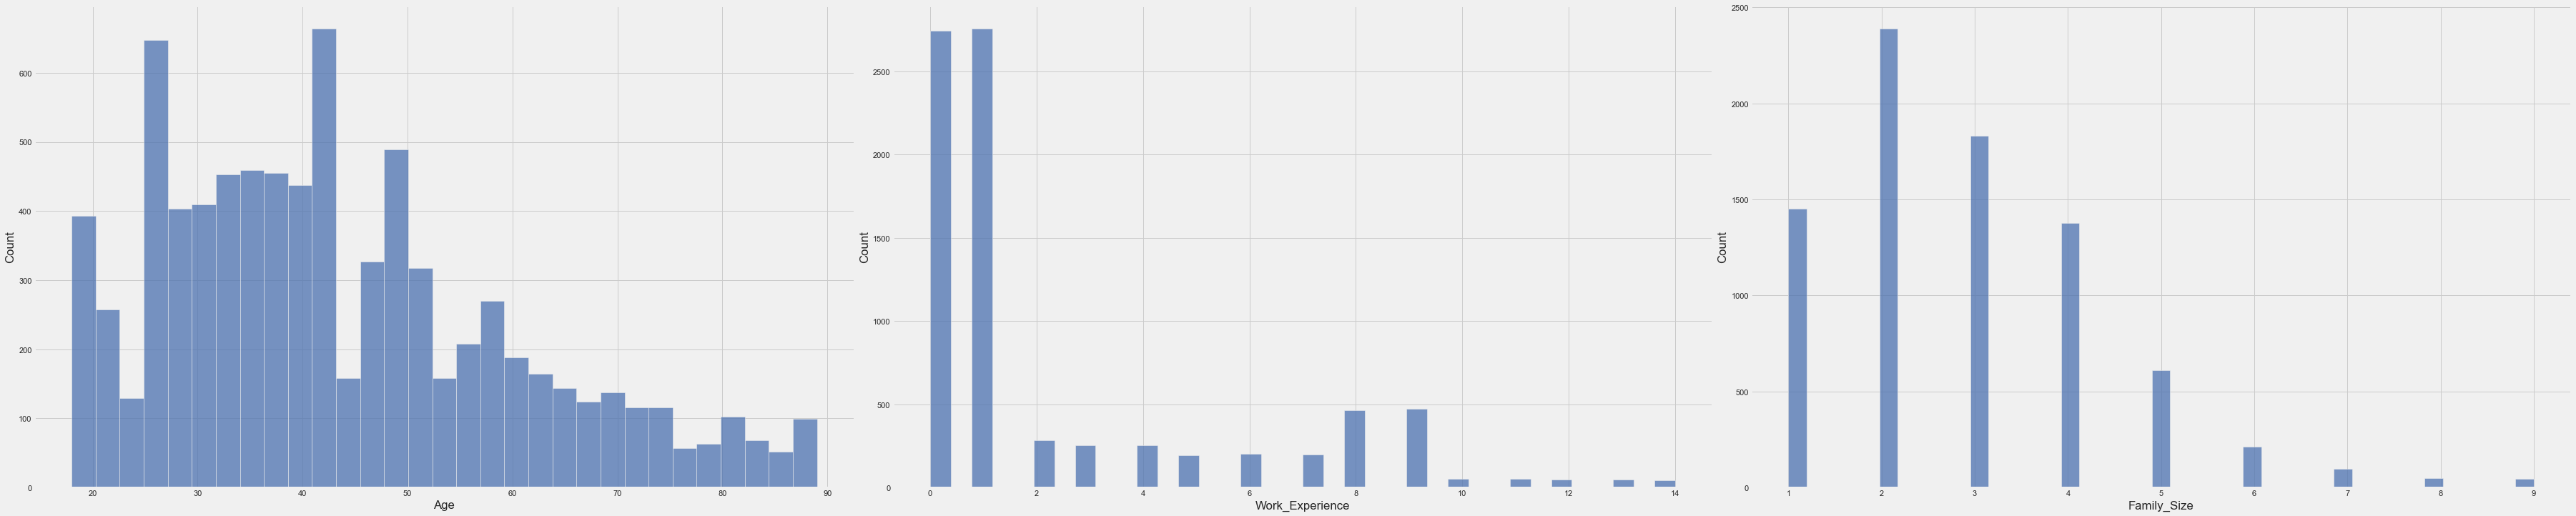

In [26]:
# Plot the distribution graph
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(50, 10))
index = 0
axs = axs.flatten()
for k,v in X_raw_num.items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

*Log Transform*

In [27]:
x_num_log = X_raw_num.copy()

# Transform the skewed distribution
for col in x_num_log.columns:
    if x_num_log[col].skew() > 0.5: #right skew, log
        x_num_log[col]= x_num_log[col].apply(lambda x: np.log1p(x))
        if x_num_log[col].skew() > 0.5: #right skew, log
            print ("Log twice: ", col, "  Because the skewness still %.2f" %(x_num_log[col].skew()))
            x_num_log[col]= x_num_log[col].apply(lambda x: np.log1p(x))
        else:
            print ("Log once: ", col)
x_num_log.head()

Log once:  Age
Log twice:  Work_Experience   Because the skewness still 0.66
Log once:  Family_Size


,Age,Work_Experience,Family_Size
0,3.135494,0.526589,1.609438
1,3.663562,0.526589,1.386294
2,4.219508,0.526589,0.693147
3,4.219508,0.000000,1.098612
4,3.713572,0.526589,1.945910


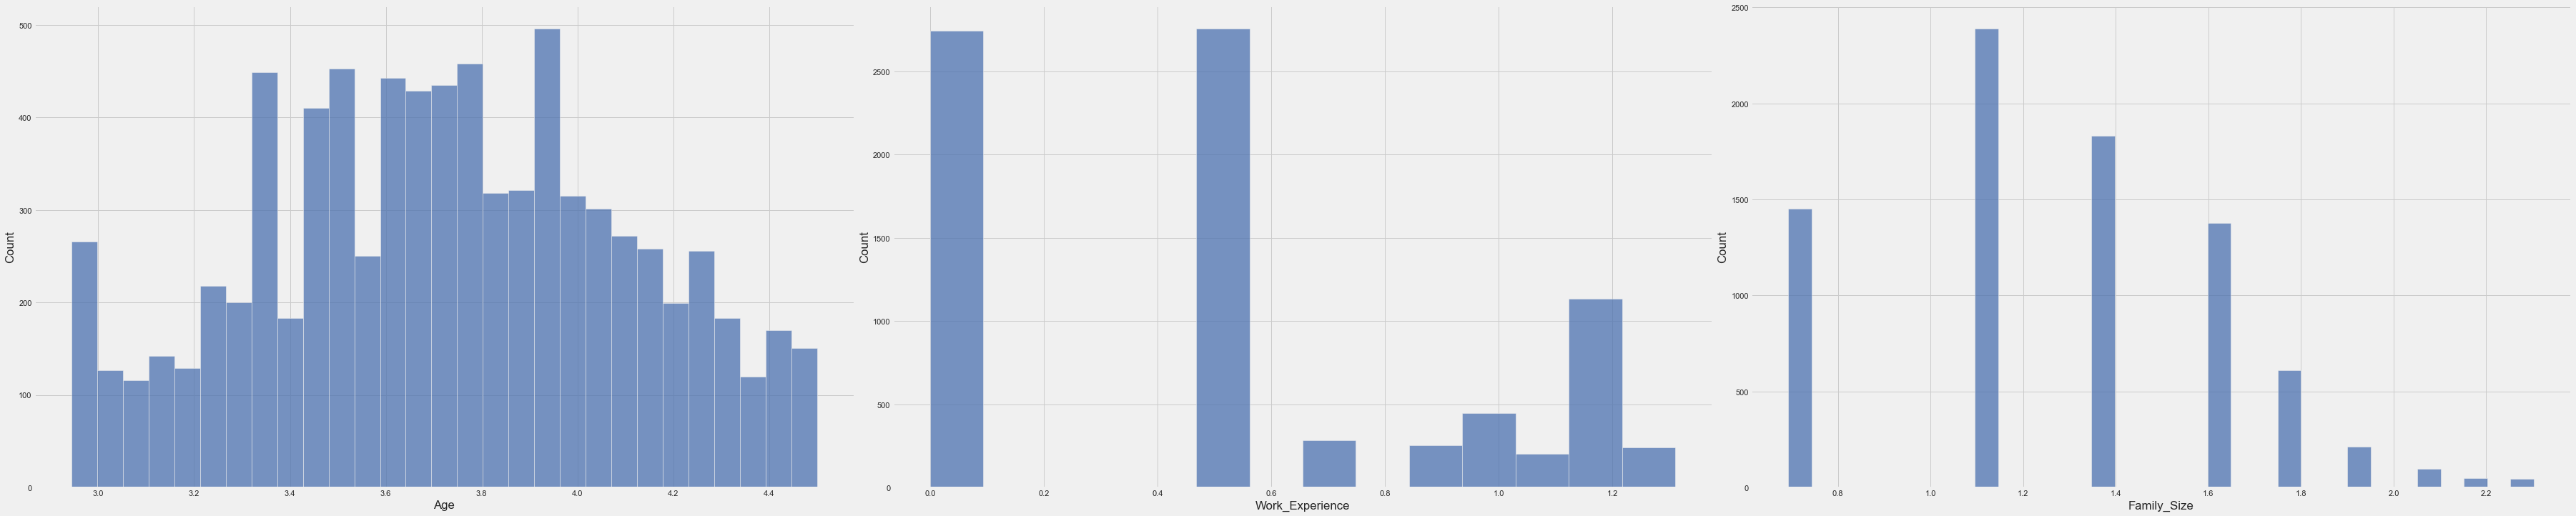

In [28]:
# Plot the distribution graph
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(50, 10))
index = 0
axs = axs.flatten()
for k,v in x_num_log.items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Dapat dilihat pada histogram di atas bahwa bentuk distribusi data numerik menjadi lebih normal.

In [29]:
# Now check the skewness and outlier
#check skewness
print("Skewness Before")
#check skewness
for col in X_raw_num.columns:
    print("Column %s skewness = %.2f" % (col, X_raw_num[col].skew()))
print(".......")
print("Skewness After")
for col in x_num_log.columns:
    print("Column %s skewness = %.2f" % (col, x_num_log[col].skew()))

    
print("...-----....")
print("...-----....")

#Outlier percentage
print("Outlier Before")

for k, v in X_raw_num.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(X_raw_num)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

print(".......")
print("Outlier After")

for k, v in x_num_log.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(x_num_log)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Skewness Before
Column Age skewness = 0.70
Column Work_Experience skewness = 1.46
Column Family_Size skewness = 1.02
.......
Skewness After
Column Age skewness = -0.03
Column Work_Experience skewness = 0.19
Column Family_Size skewness = 0.07
...-----....
...-----....
Outlier Before
Column Age outliers = 0.88%
Column Work_Experience outliers = 3.00%
Column Family_Size outliers = 2.35%
.......
Outlier After
Column Age outliers = 0.00%
Column Work_Experience outliers = 0.00%
Column Family_Size outliers = 0.00%


**Seperti yang bisa dilihat di atas, skewness berkurang hingga mendekati 0. Outlier pun hilang hingga 0%.**

### Scaling - Numerical

In [30]:
from sklearn.preprocessing import StandardScaler

column_name = ['Age', 'Work_Experience', 'Family_Size']

# Scale the X
standard_scaler = StandardScaler()
x_num = pd.DataFrame(data=standard_scaler.fit_transform(x_num_log), columns=column_name)

# Peek X a lil
x_num.head()

,Age,Work_Experience,Family_Size
0,-1.569557,0.019322,0.876402
1,-0.163683,0.019322,0.286154
2,1.316412,0.019322,-1.547326
3,1.316412,-1.176904,-0.474809
4,-0.030541,0.019322,1.766423


### Merge Processed Data

In [31]:
df_finished = pd.concat([x_num, X_label_cat, X_raw_cat, y_raw], axis=1)
df_finished.head()

,Age,Work_Experience,Family_Size,Spending_Score,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation
0,-1.569557,0.019322,0.876402,1,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,D
1,-0.163683,0.019322,0.286154,2,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,A
2,1.316412,0.019322,-1.547326,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,B
3,1.316412,-1.176904,-0.474809,3,0,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,B
4,-0.030541,0.019322,1.766423,3,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,A


Data yang akan masuk pada model Machine Learning mencakup 26 fitur

**---------**

In [32]:
df_finished.to_csv('output_p2.csv', index=False)

In [33]:
import os

os.system('jupyter nbconvert --to html Part_2_EDA_Processing.ipynb')

0